# BANK LOAN ANALYSIS REPORT



### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
import plotly.express as ex

In [3]:
df = pd.read_excel("/content/financial_loan.xlsx")

In [4]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


### Metadata

In [6]:
print("no of rows", df.shape[0])

no of rows 38576


In [7]:
print("no of columns ",df.shape[1])

no of columns  24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [10]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [11]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total Loan Applications

In [13]:
total_loan_applications = df['id'].count()
print("total loan applications :",total_loan_applications)

total loan applications : 38576


### MTD Total Loan Applications

In [14]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_loan_applications = mtd_data['id'].count()

print(f"mtd total loan applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_total_loan_applications}")




mtd total loan applications (for December 2021): 4314


### Total Funded Amount

In [17]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1_000_000
print("total funded amount : ${:.2f}M".format(total_funded_amount_millions))


total funded amount : $435.76M


### MTD - Total funded amount

In [18]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1_000_000
print("total MTD funded amount : ${:.2f}M".format(mtd_total_funded_amount_millions))

total MTD funded amount : $53.98M


### Total Amount Recieved

In [19]:
total_amount_received = df['total_payment'].sum()
total_recieved_amount_millions =  total_amount_received / 1_000_000
print("total funded amount : ${:.2f}M".format(total_recieved_amount_millions))

total funded amount : $473.07M


### MTD Total Amount Recieved

In [22]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
total_amount_received = mtd_data['total_payment'].sum()
total_recieved_amount_millions = total_amount_received / 1_000_000
print("total MTD Recieved amount : ${:.2f}M".format(total_recieved_amount_millions))

total MTD Recieved amount : $58.07M


### Average Interest Rate

In [24]:
average_intrest_rate = df['int_rate'].mean()*100
print("The average interest rate :{:.2f}%".format(average_intrest_rate))

The average interest rate :12.05%


### Average DTI(Debt-to-income-ratio)

In [25]:
average_dti = df['dti'].mean()*100
print("The average DTI :{:.2f}%".format(average_dti))

The average DTI :13.33%


### Good loan metrics

In [31]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_recieved = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_recieved_millions = good_loan_recieved / 1_000_000

good_loan_perecentage = (good_loan_applications / total_loan_applications) *100

print("Good loan applications : ",good_loan_applications  )
print("Good loan funded amount ${:.2f}M".format(good_loan_funded_amount_millions))
print("good loan recieved amount ${:.2f}M".format(good_loan_recieved_millions))
print("good loan percentage :{:.2f}%".format(good_loan_perecentage) )

Good loan applications :  33243
Good loan funded amount $370.22M
good loan recieved amount $435.79M
good loan percentage :86.18%


### Bad Loan Metrics

In [32]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_recieved = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1_000_000
bad_loan_recieved_millions = bad_loan_recieved / 1_000_000

bad_loan_perecentage = (bad_loan_applications / total_loan_applications) *100

print("Bad loan applications : ",bad_loan_applications  )
print("Bad loan funded amount ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad loan recieved amount ${:.2f}M".format(bad_loan_recieved_millions))
print("Bad loan percentage :{:.2f}%".format(bad_loan_perecentage) )

Bad loan applications :  5333
Bad loan funded amount $65.53M
Bad loan recieved amount $37.28M
Bad loan percentage :13.82%


### Monthly Trends by issue Date for Total Funded Amount

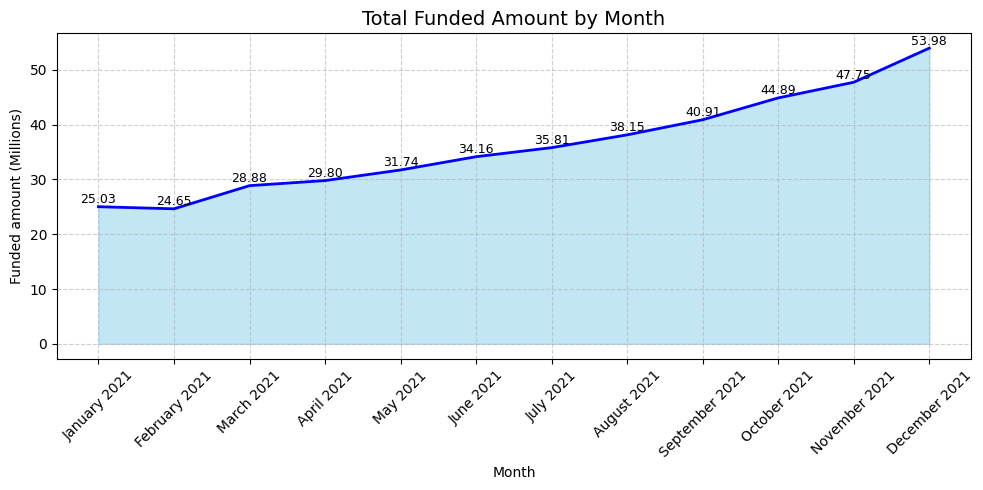

In [34]:
import matplotlib.pyplot as plt

monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%B %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(range(len(monthly_funded)), monthly_funded['loan_amount_millions'],
                 color='skyblue', alpha=0.5)
plt.plot(range(len(monthly_funded)), monthly_funded['loan_amount_millions'],
         color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1,
             f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel("Month")
plt.ylabel("Funded amount (Millions)")
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Monthly Trends by issue date for total amount recieved

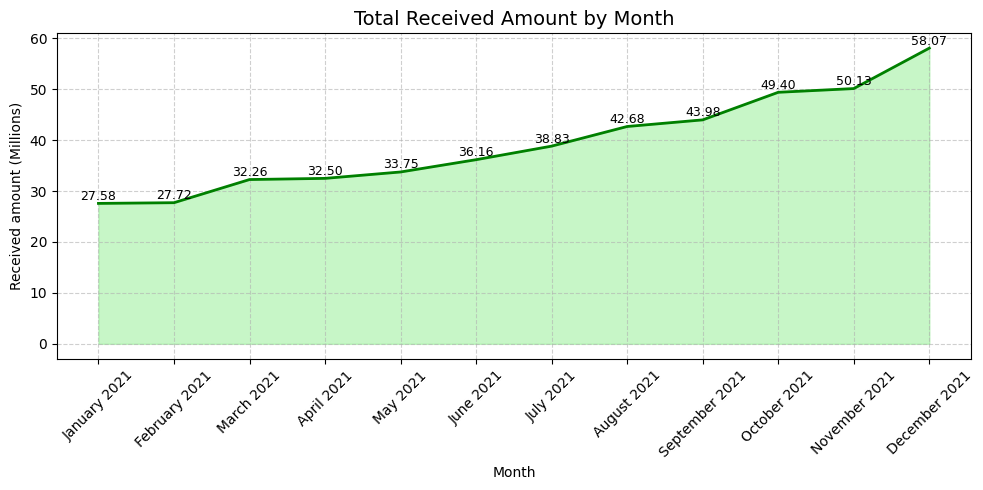

In [36]:
import matplotlib.pyplot as plt

monthly_recieved = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%B %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1_000_000)
      .reset_index(name='recieved_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(range(len(monthly_recieved)), monthly_recieved['recieved_amount_millions'],
                 color='lightgreen', alpha=0.5)
plt.plot(range(len(monthly_recieved)), monthly_recieved['recieved_amount_millions'],
         color='green', linewidth=2)

for i, row in monthly_recieved.iterrows():
    plt.text(i, row['recieved_amount_millions'] + 0.1,
             f"{row['recieved_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel("Month")
plt.ylabel("Received amount (Millions)")
plt.xticks(ticks=range(len(monthly_recieved)), labels=monthly_recieved['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Monthly Trends by issue date for total loan applications

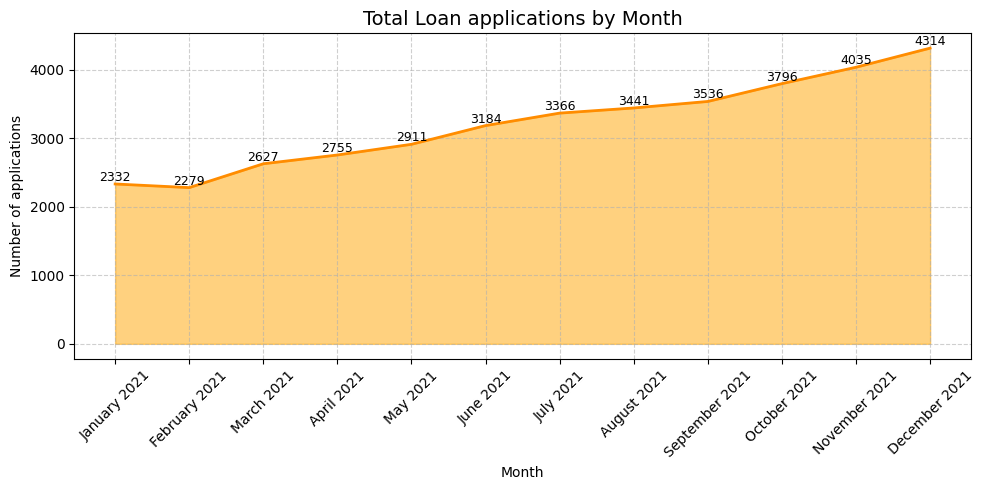

In [38]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name = lambda x: x['issue_date'].dt.strftime('%B %Y'))
      .groupby('month_name', sort = False)['id']
      .count()
      .reset_index(name = 'loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications ['month_name'], monthly_applications['loan_applications_count'], color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color='darkorange', linewidth=2)


for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.1,
             f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9,rotation = 0, color='black')

plt.title('Total Loan applications by Month', fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of applications")
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Regional Analyisi by State for total funded amount

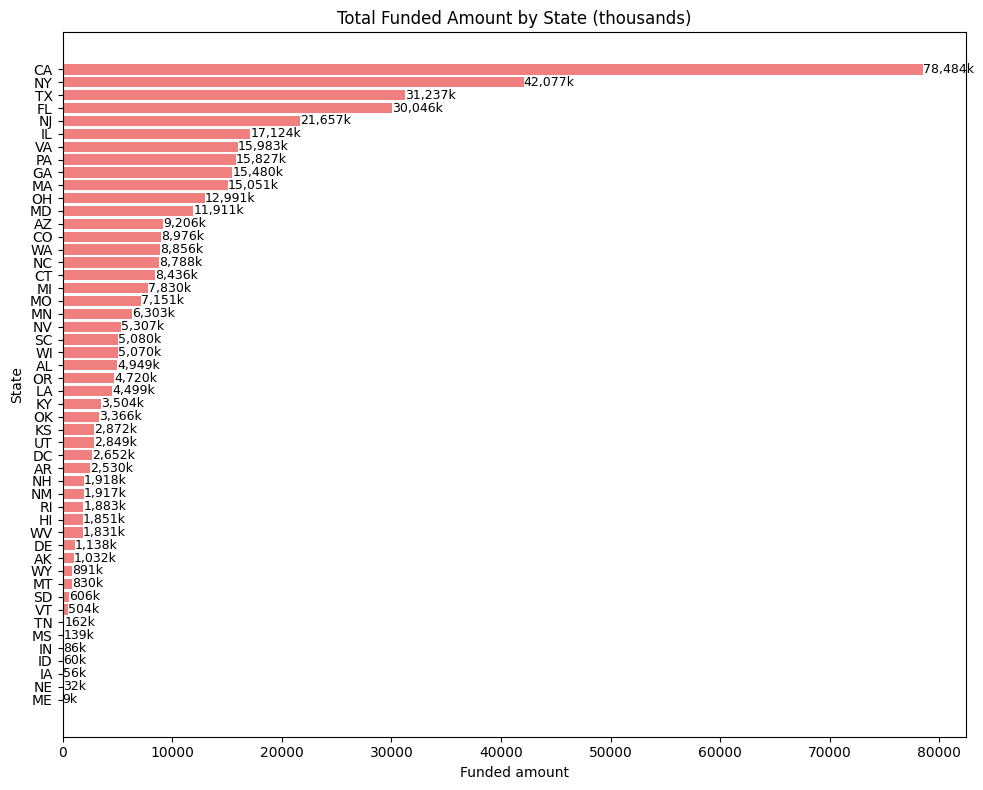

In [40]:
import matplotlib.pyplot as plt

state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}k', va='center', fontsize=9)

plt.title('Total Funded Amount by State (thousands)')
plt.xlabel('Funded amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()



### Long term analysis by total funded amount

Text(0.5, 1.0, 'Total Funded Amount by Term')

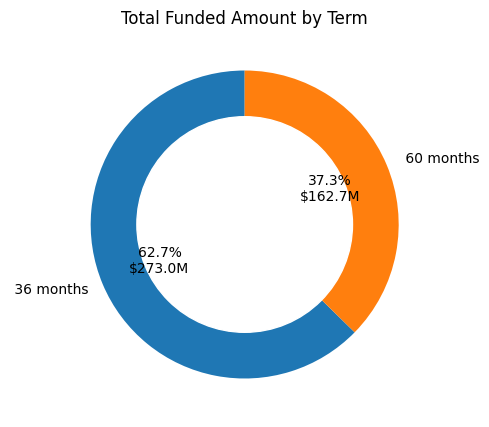

In [42]:
import matplotlib.pyplot as plt

term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1_000_000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${(p/100)*term_funding_millions.sum():.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)

# Add a white circle in the center to create a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

plt.title("Total Funded Amount by Term")
